<a href="https://colab.research.google.com/github/RafaelColin/EDP/blob/main/Dirichlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de un problema de Dirichlet

La solución de la ecuación
$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$
$$0<x<a \;, \; 0<x<b$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(a,y)=0$$
$$u(x,0)=0, \;\;\; u(x,b)=f(x)$$
Y la condición inicial:
$$f(x)=100,\; a=1, \; b=1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=200\sum_{n=1}^{\infty} [\frac{1-(-1)^{n}}{nπsinh(nπ)}]  \sin(n\pi x)sinh(nπy).$$

In [119]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [120]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] =100
    return y

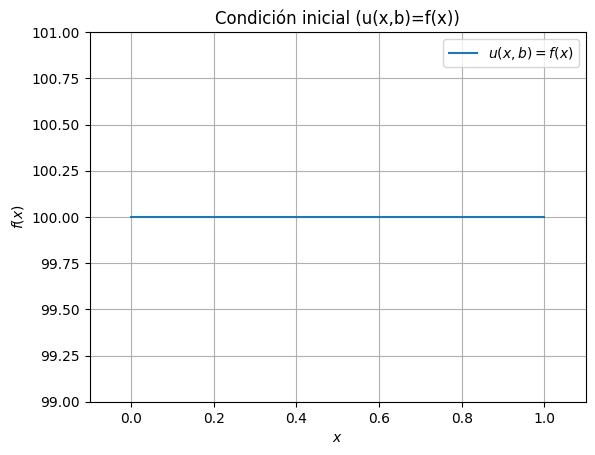

In [121]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,b)=f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,b)=f(x))")
xlim([-0.10,1.10]),ylim([99,101]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,b)=f(x)=100$.

In [122]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-(-1)**(n)*sin(n*pi*x))/(n*pi*sinh(n*pi))
    return (200)*f

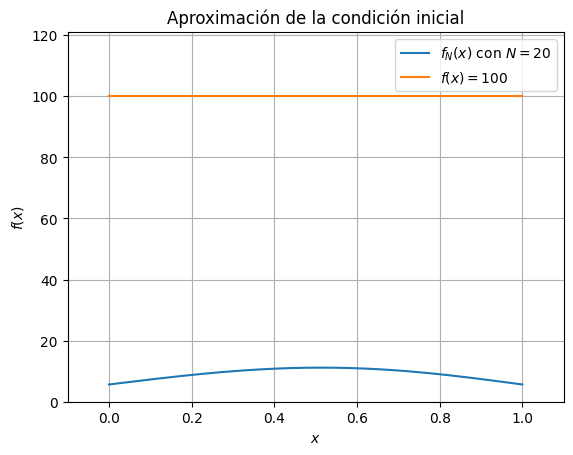

In [123]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=100$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.1,1.1]),ylim([-0.01,121]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

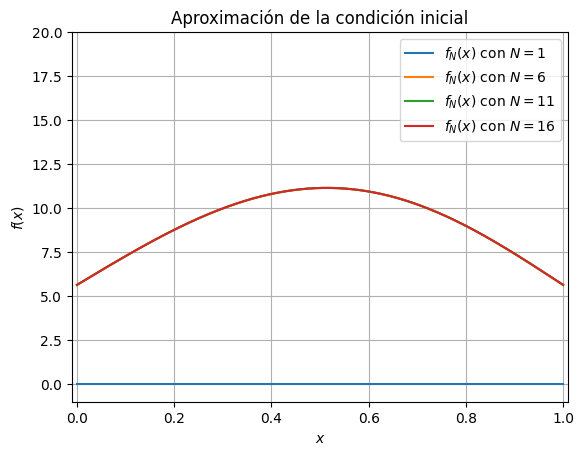

In [124]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-1,20]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [125]:
def u_x_y(x,y,N=20):
    f = zeros(len(x))
    for n in range(1,N):
            f += (1-(-1)**(n)*sin(n*pi*x))/(n*pi*sinh(n*pi))*sinh(n*pi*y)
    return (200)*f

In [126]:
x = linspace(0,1,1000)
y_values = [0.25, 0.5, 0.75, 1.0]

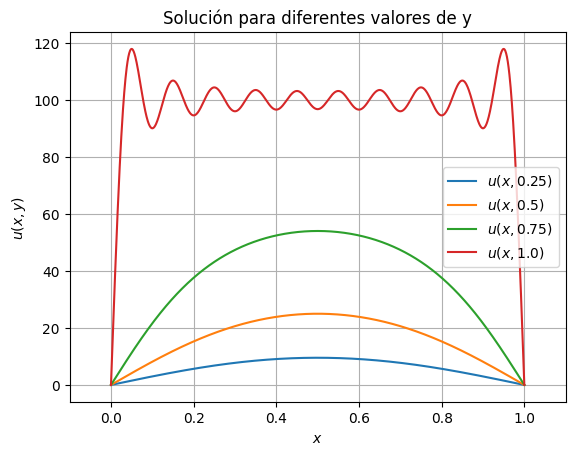

In [127]:
for y_val in y_values:
    u_val = u_xy(x, y_val)
    plot(x, u_val, label=f'$u(x,{y_val})$')

plt.xlabel('$x$')
plt.ylabel('$u(x,y)$')
plt.title("Solución para diferentes valores de y")
xlim([-0.10, 1.10])
grid()
legend()
show()

Y podemos ver esto en una gráfica en 3D.

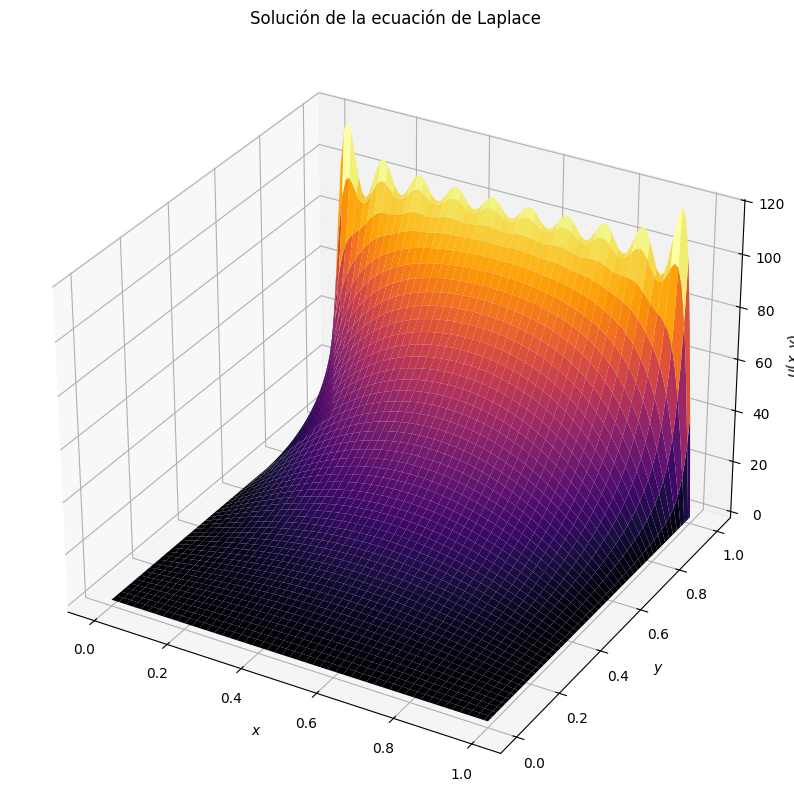

In [130]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

x = linspace(0, 1.0, 100)
y = linspace(0, 1.0, 100)
X, Y = np.meshgrid(x, y)

U = zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        U[j, i] = u_xy(array([x[i]]), y[j])[0]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, U, cmap="inferno")  # Otros colores: "viridis", "plasma"

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$u(x,y)$')
ax.set_title("Solución de la ecuación de Laplace")

plt.show()